In [1]:
%%capture
%cd ..

In [2]:
# Import data

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from utils.constants import white_list

ModuleNotFoundError: No module named 'utils.constants'

In [3]:
ds_root = 'dataset/cleaned'

[1.157049293970263, 1.1561674964824928, 1.154839692505925, 1.153415786975568, 1.1544701195348002, 1.1529562390503103, 1.1483180660210435, 1.145093063867293, 1.1429033958089692, 1.1419083629742994, 1.1431054850007492, 1.142635430705976, 1.141729388960032, 1.1409402043796693, 1.1402437099479332, 1.1394288256763172, 1.1384374893280498, 1.137697317910412, 1.1369042170712156, 1.1361110913127206, 1.135313384416591, 1.1340264654287715, 1.1289573749941333, 1.126907610758952, 1.1251993910153928, 1.1216568167363334, 1.120888799445673, 1.123981338497238, 1.1220059888424743, 1.1185101754268487, 1.1175622334486164, 1.1164152473000257, 1.1184222302426434, 1.1198980193963166, 1.1155550131070342, 1.1144065196828876, 1.1133759404298402, 1.1136117600311337, 1.1157549044535884, 1.1125284111046838, 1.110123570325861, 1.1093985164469942, 1.1100180778635647, 1.1121332831309942, 1.1124563265956198, 1.1125832773401072, 1.1127727288257176, 1.1129542588958827, 1.1126918286148495, 1.109572433578295, 1.1245367436

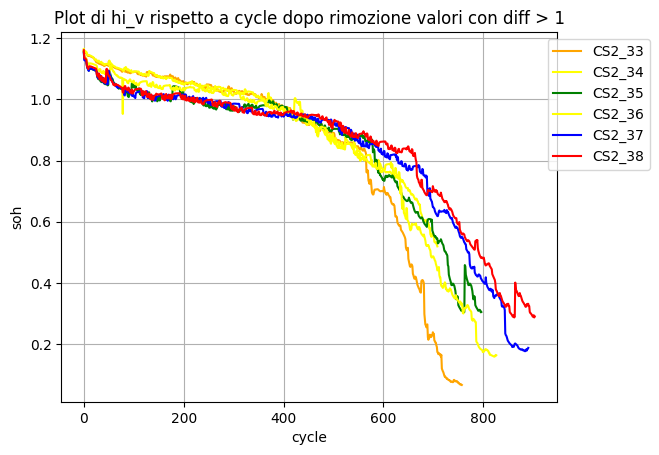

In [11]:
# PLOT GRAFICI DI CARICA

# Lista dei colori che vuoi utilizzare per le curve
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']

# Inizializza il plot
plt.figure()

# Lista per i nomi dei file
file_names = []

# Dizionario per memorizzare i risultati di ogni file
results_dict = {}

# Loop attraverso i file in ds_root
for i, file_name in enumerate(os.listdir(ds_root)):
    file_path = os.path.join(ds_root, file_name)
    if file_name.startswith('charge'):
        df = pd.read_csv(file_path)

        first_step_index_2 = df[df['Step_Index'] == 2].groupby('Cycle_Index').head(1)
        last_step_index_4 = df[df['Step_Index'] == 4].groupby('Cycle_Index').tail(1)
        
        cycle_indexes2 = first_step_index_2['Cycle_Index'].index  # ha indice riga e numero del ciclo
        cycle_indexes4 = last_step_index_4['Cycle_Index'].index

        first = []
        for i in cycle_indexes2:
            first.append(df.iloc[i, 6])

        last = []
        for i in cycle_indexes4:
            last.append(df.iloc[i, 6])

        result = [b - a for a, b in zip(first, last)]

        # Andiamo ad eliminare gli outliers, valori che hanno un valore molto differente dall'andamento
        filtered_vector = [result[0]]  # Inizializza il nuovo vettore con il primo elemento
        for i in range(1, len(result)):
            difference = abs(result[i] - result[i - 1])
            if difference <= 0.01: # Valori minori rendono la curva piu selettiva
                filtered_vector.append(result[i])
            # else:
            #     while i+1 < len(result) and difference > 0.04:
            #         difference = abs(result[i+1] - current)
            #         i = i+1
            #     if i < len(result): filtered_vector.append(result[i])
                

        # Stampa i valori delle differenze
        # print(filtered_vector)

        cs2x_part = file_name.split('charge-')[1].split('.csv')[0]
        file_names.append(cs2x_part)

        # Salva i risultati nel dizionario solo se non sono già presenti
        if cs2x_part not in results_dict:
            results_dict[cs2x_part] = result

        # Traccia la curva utilizzando un colore dalla lista colors
        plt.plot(filtered_vector, label=f'{cs2x_part}', linestyle='-', color=colors[i % len(colors)])


# Aggiungi titoli e legenda
plt.title('Plot di hi_v rispetto a cycle dopo rimozione valori con diff > 1')
plt.xlabel('cycle')
plt.ylabel('soh')
plt.grid(True)

# Sposta la legenda in alto a destra senza che esca dalla figura
plt.legend(file_names, loc='upper right', bbox_to_anchor=(1.2, 1.))

# Mostra il plot
plt.show()



[1.16015860507985, 1.1558299155896181, 1.154736200515347, 1.153533565161756, 1.1531983915386192, 1.15148169799068, 1.1461874761791702, 1.1441766327069889, 1.1420265499405131, 1.1429545342855896, 1.1430341195568268, 1.1424519275583354, 1.1415891659451205, 1.1407972121858716, 1.1400150222124807, 1.1392286094349693, 1.1382799668776737, 1.13753131173603, 1.136774593503123, 1.135970414009872, 1.1352711780155111, 1.131941311809836, 1.1282940871545684, 1.126705971197481, 1.1253417953017433, 1.1212839175889293, 1.122347059331112, 1.1242170887567582, 1.1198257583408093, 1.118443226327031, 1.1176827318686833, 1.11723562897825, 1.1201343473605618, 1.1185848740833606, 1.1153730190893612, 1.1145078216538309, 1.1132751778251517, 1.1162103298586388, 1.1157891186285553, 1.1115625236168185, 1.1107445200896606, 1.1099255788663243, 1.112774531269217, 1.113305250619696, 1.1134709336034305, 1.113509789629795, 1.1139472423976713, 1.1137049368840195, 1.1134575737100718, 1.123596689057563, 1.1233256088266939,

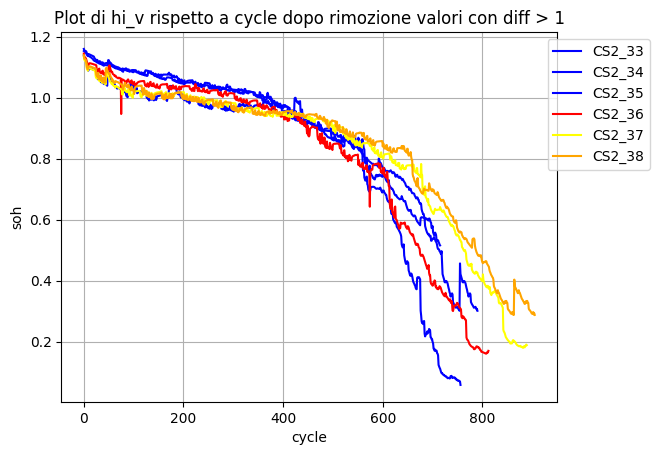

In [10]:
# PLOT DEI GRAFICI DI SCARICA

# Lista dei colori che vuoi utilizzare per le curve
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']

# Inizializza il plot
plt.figure()

# Lista per i nomi dei file
file_names = []

# Dizionario per memorizzare i risultati di ogni file
results_dict = {}

# Loop attraverso i file in ds_root
for i, file_name in enumerate(os.listdir(ds_root)):
    file_path = os.path.join(ds_root, file_name)
    if file_name.startswith('discharge'):
        df = pd.read_csv(file_path)

        first_step_index_7 = df[df['Step_Index'] == 7].groupby('Cycle_Index').head(1).index
        last_step_index_7 = df[df['Step_Index'] == 7].groupby('Cycle_Index').tail(1).index
    

        first1 = []
        for i in first_step_index_7:
            first1.append(df.iloc[i, 5])

        last1 = []
        for i in last_step_index_7:
            last1.append(df.iloc[i, 5])

        result1 = [b - a for a, b in zip(first1, last1)]

        filtered_vector_discharge = [result1[0]]  # Inizializza il nuovo vettore con il primo elemento
        for i in range(1, len(result1)):
            difference = abs(result1[i] - result1[i - 1])
            if difference <= 0.01: # Valori minori rendono la curva piu selettiva
                filtered_vector_discharge.append(result1[i])

        # Stampa i valori delle differenze
        # print(filtered_vector_discharge)
                
        cs2x_part = file_name.split('discharge-')[1].split('.csv')[0]
        file_names.append(cs2x_part)

        # Salva i risultati nel dizionario solo se non sono già presenti
        if cs2x_part not in results_dict:
            results_dict[cs2x_part] = result1

        print(filtered_vector_discharge)
        # Traccia la curva utilizzando un colore dalla lista colors
        plt.plot(filtered_vector_discharge, label=f'{cs2x_part}', linestyle='-', color=colors[i % len(colors)])


# Aggiungi titoli e legenda
plt.title('Plot di hi_v rispetto a cycle dopo rimozione valori con diff > 1')
plt.xlabel('cycle')
plt.ylabel('soh')
plt.grid(True)

# Sposta la legenda in alto a destra senza che esca dalla figura
plt.legend(file_names, loc='upper right', bbox_to_anchor=(1.2, 1.))

# Mostra il plot
plt.show()


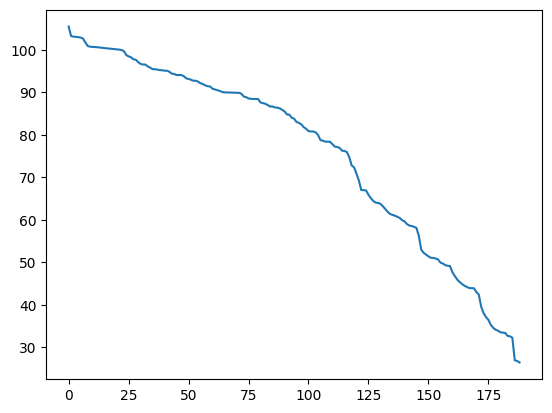

In [118]:
for i in range(len(result) - 1, 0, -1):
    
    if result[i - 1] <= result[i]:
        del result[i - 1]


valori = []
for j in range(len(result)):
    val = (result[j]/(1.1))
    val = val*100
    valori.append(val)



plt.plot(valori)

In [ ]:
# first_step_index_2 = cleaned[cleaned['Step_Index'] == 2].groupby('Cycle_Index').head(1)
# last_step_index_4 = cleaned[cleaned['Step_Index'] == 4].groupby('Cycle_Index').tail(1)
# cycle_indexes2 = first_step_index_2['Cycle_Index'].index # ha indice riga e numero del ciclo
# cycle_indexes4 = last_step_index_4['Cycle_Index'].index 

# first = []
# for i in cycle_indexes2:
#     first.append(cleaned.iloc[i,6])

# last = []
# for i in cycle_indexes4:
#     last.append(cleaned.iloc[i,6])
    
# result = [b - a for a, b in zip(first, last)]
# print(result)

# dim = len(result)
# print(dim)

# plt.plot(result)